In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [8]:
a = np.array([3,-3.3,30,1])
b = np.array([-2.1,8,1.34])
c = np.array([0.1,7.4,-2.1, 1])

q_scale = np.array([0.97,1.76,0.03])
q_neg = np.array([-0.97,-1.76,-0.03])

In [4]:
def translationMatrix(vector):
  matrix = np.identity(len(vector) + 1)
  matrix[-1,:-1] = vector
  return matrix.T

def scaleMatrix(vector):
  return np.diag([*vector, 1])

def homogenize(vector):
    res = [x for x in vector]
    res.append(1)
    return np.array(res)

def dehomogenize(vector):
    return vector[:-1]

def rotationMatrix(angle_degrees, axis='x', dim=3):
  angle = np.deg2rad(angle_degrees)
  ii = np.cos(angle)
  ji = np.sin(angle)
  matrix = np.identity(dim + 1)
  if axis == 'z':
    matrix[0, 0] = ii
    matrix[1, 1] = ii
    matrix[0, 1] = -ji
    matrix[1, 0] = ji
  elif axis == 'y':
    matrix[0, 0] = ii
    matrix[2, 2] = ii
    matrix[0, 2] = -ji
    matrix[2, 0] = ji
  else:
    matrix[1, 1] = ii
    matrix[2, 2] = ii
    matrix[1, 2] = -ji
    matrix[2, 1] = ji
  return matrix


## Problema 1

In [4]:
# Parte A
composed_matrix = translationMatrix(b) @ scaleMatrix(q_scale) 
q = composed_matrix @ a
q

array([0.81 , 2.192, 2.24 , 1.   ])

In [5]:
# Parte B
neg = np.negative(q)
neg_translate = translationMatrix(neg[:-1])
z_rotation = rotationMatrix(23.1,axis="z",dim=3)
y_rotation = rotationMatrix(0.4,axis="y",dim=3)
composed_matrix_b = translationMatrix(q[:-1]) @ y_rotation @ z_rotation @ neg_translate
res1 = composed_matrix_b @ c
res1

array([-1.85600059,  6.70387101, -2.11871826,  1.        ])

## Problema 2

Razonamiento detras de vertices de la base en la posicion en la que estan

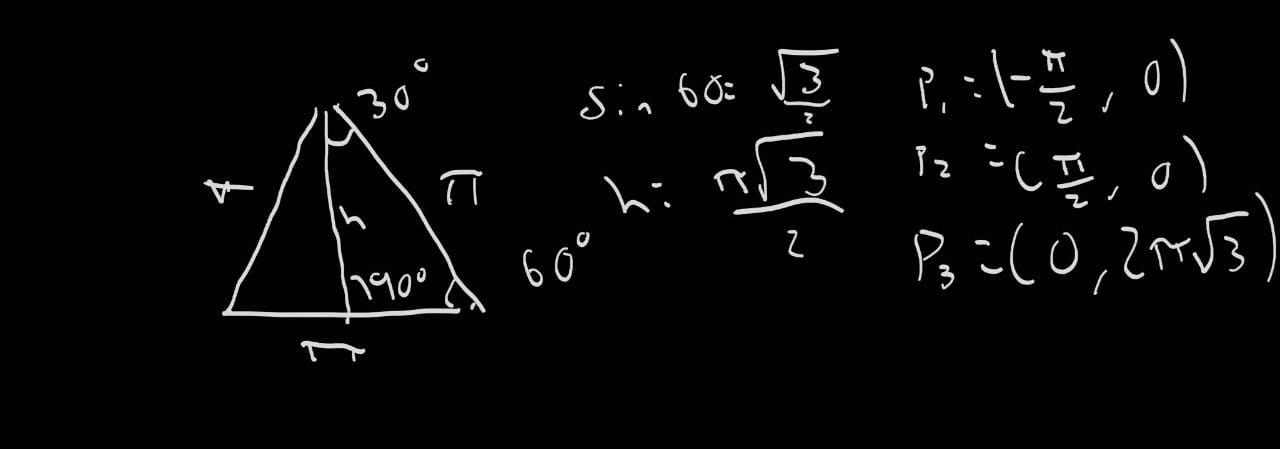

In [6]:
from IPython.display import Image
Image(filename='/home/salypimientado/Desktop/WhatsApp Image 2021-11-09 at 9.57.11 PM.jpeg') 

Declaracion de vertices en la base

In [6]:
h = 6*np.pi/5 + math.sqrt(2/3)

p1 = np.array(((-np.pi)/2, 0, 0))
p2 = np.array(((np.pi)/2, 0, 0))
p3 = np.array((0, np.pi*math.sqrt(3)/2, 0))
center = (p1+p2+p3)/3
p4 = center + (0,0,h)


In [7]:
first_translate = translationMatrix((1.61,-3.13,-4.78)- center)
first_translate

array([[ 1.        ,  0.        ,  0.        ,  1.61      ],
       [ 0.        ,  1.        ,  0.        , -4.03689968],
       [ 0.        ,  0.        ,  1.        , -4.78      ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

Los vertices de la piramide

In [8]:
points = [dehomogenize(first_translate @ homogenize(x)) for x in [p1,p2,p3,p4]]
points

[array([ 0.03920367, -4.03689968, -4.78      ]),
 array([ 3.18079633, -4.03689968, -4.78      ]),
 array([ 1.61      , -1.31620064, -4.78      ]),
 array([ 1.61      , -3.13      , -0.19359223])]

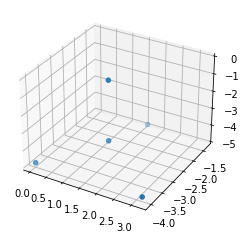

In [21]:
orig_centroid = (points[0]+points[1]+points[2]+points[3])/4
display = [x for x in points]
display.append(orig_centroid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.scatter([x[0] for x in display], [x[1] for x in display], [x[2] for x in display])
plt.show()

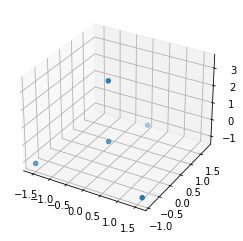

array([-1.66533454e-16,  1.11022302e-16,  0.00000000e+00])

In [19]:
translate_centroid_to_0 = translationMatrix(np.negative(orig_centroid))
tcpoints = [dehomogenize(translate_centroid_to_0 @ homogenize(x)) for x in points]
centroid = (tcpoints[0]+tcpoints[1]+tcpoints[2]+tcpoints[3])/4
display = [x for x in tcpoints]
display.append(centroid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.scatter([x[0] for x in display], [x[1] for x in display], [x[2] for x in display])
plt.show()
centroid

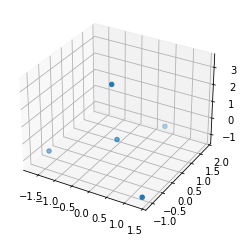

array([-1.79391345e-16,  1.59594560e-16, -1.11022302e-16])

In [20]:
rotate_z = rotationMatrix(-11,axis="z",dim=3)
rotate_x = rotationMatrix(4.1,axis="x",dim=3)
rotated_points = [dehomogenize(rotate_x @ rotate_z @ homogenize(x)) for x in tcpoints]
centroid = (rotated_points[0]+rotated_points[1]+rotated_points[2]+rotated_points[3])/4
display = [x for x in rotated_points]
display.append(centroid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')


ax.scatter([x[0] for x in display], [x[1] for x in display], [x[2] for x in display])
plt.show()
centroid

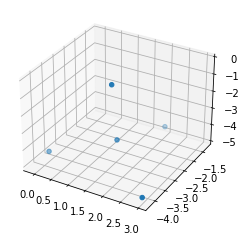

In [17]:
final_transform = translationMatrix(orig_centroid)
l = [dehomogenize(final_transform @ homogenize(x)) for x in rotated_points]
centroid = (l[0]+l[1]+l[2]+l[3])/4
display = [x for x in l]
display.append(centroid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')


ax.scatter([x[0] for x in display], [x[1] for x in display], [x[2] for x in display])
plt.show()

Matriz de transformaciones compuesta

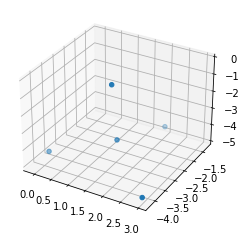

In [18]:
orig_centroid = (points[0]+points[1]+points[2]+points[3])/4
translate_centroid_to_0 = translationMatrix(np.negative(orig_centroid))
rotate_z = rotationMatrix(-11,axis="z",dim=3)
rotate_x = rotationMatrix(4.1,axis="x",dim=3)
final_transform = translationMatrix(orig_centroid)
composed = final_transform @ rotate_x @ rotate_z @ translate_centroid_to_0 
l = [dehomogenize(composed @ homogenize(x)) for x in points]
centroid = (l[0]+l[1]+l[2]+l[3])/4
display = [x for x in l]
display.append(centroid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.scatter([x[0] for x in display], [x[1] for x in display], [x[2] for x in display])
plt.show()